<h1 align='center'> Football Transfer Market Data Analysis <h1>


# Scraping Player Data for Argentinos Juniors: Exploring Seasons and Market Values





**Importing libraries**


In [5]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

print("Packages installed")

Packages installed


**Scraping and Organizing Football Player Data**

This code scrapes player data from the website "transfermarkt.com.ar" for multiple seasons of the "Argentinos Juniors" football team. It uses the Python libraries "requests" and "BeautifulSoup" to parse the HTML content of the webpages and extract relevant player information. The data is then cleaned and organized into a Pandas DataFrame, which is later saved as a CSV file named "jugadores.csv".

The code iterates through a list of URLs, each representing a different season's player data. It collects information such as player names, positions, dates of birth, heights, preferred foot, previous team, market value, and the corresponding season. The data is stored in separate lists for each attribute and then compiled into a DataFrame.

Finally, the DataFrame is saved to a CSV file for further analysis or use.

In [110]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'
}

page_urls = [
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/saison_id/2007/plus/1",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2021"
]

players_list = []
position_list = []
birthdate_list = []
height_list = []
footed_list = []
signed_list = []
previous_team_list = []
market_value_list = []
season_list = []

for i, url in enumerate(page_urls):
    pageTree = requests.get(url, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    players_data = pageSoup.find_all("tr", {"class": ["odd", "even"]})

    for player in players_data:
        player_info = player.find_all("td")
        player_name = player_info[3].text.strip()
        position = player_info[4].text.strip()
        age = player_info[5].text.strip().split()[0] 
        height = player_info[8].text.strip()
        footed = player_info[9].text.strip()
        signed = player_info[10].text.strip()
        previous_team = player_info[11].find("img")["title"] if player_info[11].find("img") else ""
        market_value = player_info[13].text.strip()
        players_list.append(player_name)
        position_list.append(position)
        birthdate_list.append(age)
        height_list.append(height)
        footed_list.append(footed)
        signed_list.append(signed)
        previous_team_list.append(previous_team)
        market_value_list.append(market_value)
        season_list.append(i + 1)

df = pd.DataFrame({
    "Jugadores": players_list,
    "Posicion": position_list,
    "Fecha de nacimiento": birthdate_list,
    "Altura": height_list,
    "Pie": footed_list,
    "Fichado": signed_list,
    "Equipo Anterior": previous_team_list,
    "Valor de mercado": market_value_list,
    "Temporada": season_list
})

df.to_csv('jugadores.csv', index=False)



**Get Data**

I transformed the data into an Excel file for analysis and visualization.







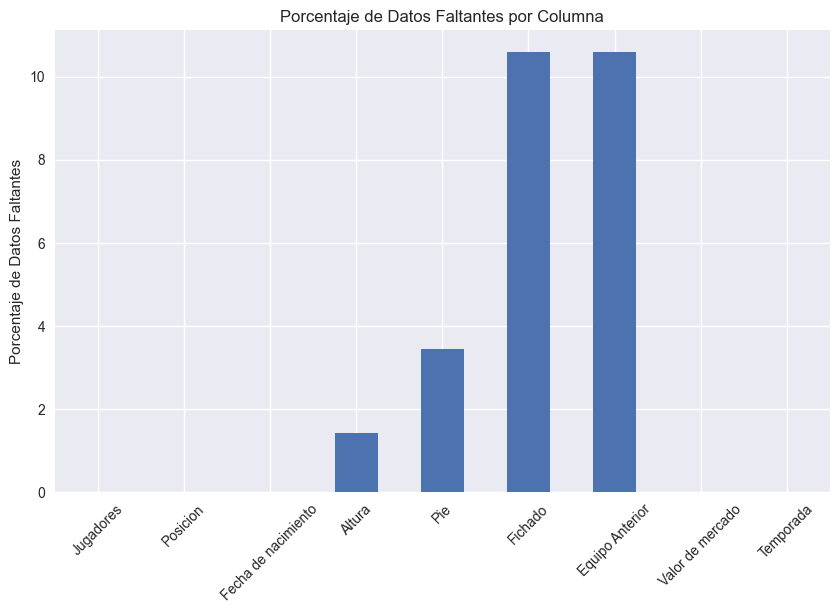

In [32]:
# Leer el archivo Excel
df = pd.read_excel("jugadores AAAJ.xlsx")

# Obtener el porcentaje de datos faltantes
missing_data_percentage = (df.isnull().sum() / len(df)) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
missing_data_percentage.plot(kind="bar")
plt.title("Porcentaje de Datos Faltantes por Columna")
plt.ylabel("Porcentaje de Datos Faltantes")
plt.xticks(rotation=45)
plt.show()



In brief, this code snippet imports the pandas and matplotlib.pyplot libraries, reads data from an Excel file into a DataFrame, calculates the percentage of missing data in each column, and visualizes it using a bar plot. The plot shows the percentage of missing data for each column on the y-axis and the column names on the x-axis, with rotated labels for better readability.


**Data cleaning** 

The function clean_market_value converts the "Valor de mercado" column in the DataFrame df from strings with currency symbols to numeric values representing players' market values in Euros.





In [135]:

def clean_market_value(value):
    if isinstance(value, str):
        if "mill." in value:
            return float(value.replace(" mill. €", "").replace(",", "")) * 1000000
        elif "mil" in value:
            return float(value.replace(" mil €", "").replace(",", "")) * 1000
    return 0

# Leer el archivo Excel
df = pd.read_excel("jugadores AAAJ.xlsx")

# Limpiar los valores de mercado
df["Valor de mercado"] = df["Valor de mercado"].apply(clean_market_value)




We are cleaning the "Fecha de nacimiento" column (Date of Birth) by removing any parentheses using the str.strip("()") method. Then, we convert the cleaned values to numeric data type using the pd.to_numeric() function with the errors="coerce" parameter.

In [19]:
# Limpiar los paréntesis en la columna "Fecha de nacimiento" y convertirla a valores numéricos (Edad)
df["Edad"] = df["Fecha de nacimiento"].str.strip("()")
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")


This code cleans the "Height" column in the dataset by converting the height values to floating-point numbers in meters and removing any invalid or missing data.






In [40]:
# Definir la función para limpiar la altura
def clean_height(height):
    try:
        return float(height.replace("m", "").replace(",", "."))
    except:
        return None

# Leer el archivo Excel con los datos de los jugadores
df = pd.read_excel("jugadores AAAJ.xlsx")

# Limpiar los datos de la altura
df["Altura"] = df["Altura"].apply(clean_height)

# Filtrar los datos inválidos o nulos de la altura
df = df.dropna(subset=["Altura"])


**Bar Chart of Total Market Value per Season for 'Argentinos Juniors' Team**


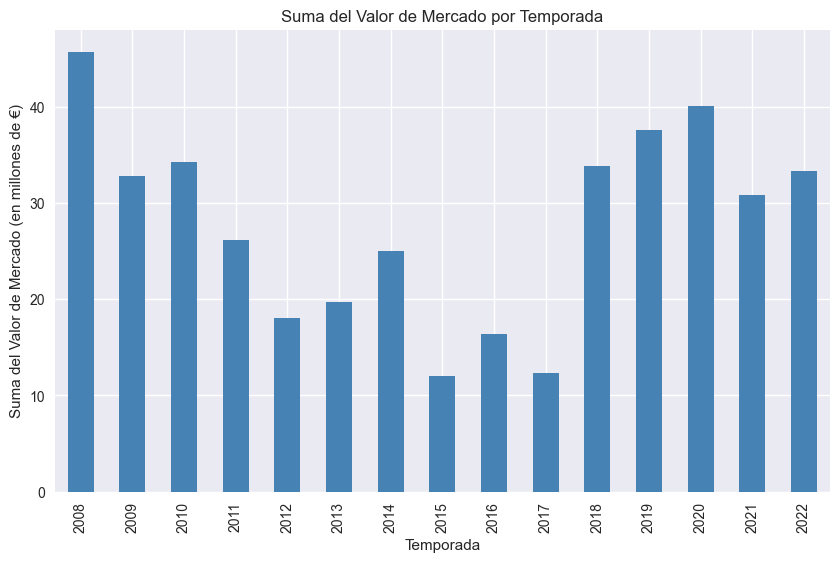

In [20]:


# Agrupar por temporada y calcular la suma de los valores de mercado
market_value_sum = df.groupby("Temporada")["Valor de mercado"].sum()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
market_value_sum.plot(kind="bar", ax=ax, color="steelblue")

# Configurar los ejes y título del gráfico
ax.set_xlabel("Temporada")
ax.set_ylabel("Suma del Valor de Mercado (en millones de €)")
ax.set_title("Suma del Valor de Mercado por Temporada")

# Ajustar el formato del eje Y para mostrar los valores en millones
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000000)}"))

# Mostrar el gráfico
plt.show()


This code creates a bar chart using Seaborn to visualize the total market value per season for the football team 'Argentinos Juniors'. It aggregates the data by season, calculates the sum of the market values, and presents the results in a bar chart with the Y-axis formatted in millions of euros.






**Visualizing Seasonal Total Market Value with Seaborn Heatmap**

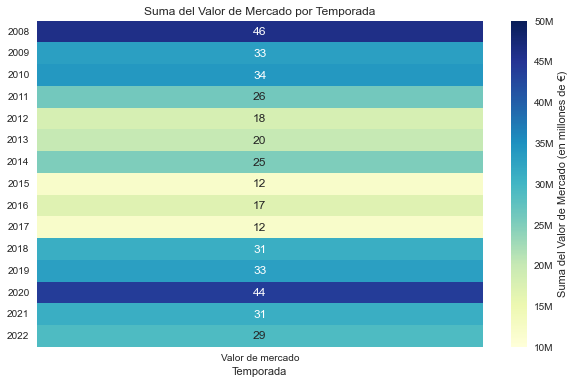

In [141]:

# Agrupar por temporada y calcular la suma de los valores de mercado
market_value_sum = df.groupby("Temporada")["Valor de mercado"].sum()

# Crear una tabla pivot para el mapa de calor
table = pd.pivot_table(df, values="Valor de mercado", index="Temporada", aggfunc="sum")

# Redondear los valores dentro de la tabla del mapa de calor
table = table.applymap(lambda x: round(x / 1000000))

# Crear un mapa de calor utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, cbar_kws={"label": "Suma del Valor de Mercado (en millones de €)",
                                                                              "format": FuncFormatter(lambda x, pos: f"{int(x):,}M")},
            vmin=10, vmax=50)  # Establecer los límites de la barra de color
plt.title("Suma del Valor de Mercado por Temporada")
plt.xlabel("Temporada")
plt.ylabel("")

# Mostrar el mapa de calor
plt.show()



This code calculates the total market value of a football team for each season and presents the results in a heatmap using Seaborn. The values are grouped by season, rounded, and displayed in the heatmap with a color bar indicating the range of values.

**Top 20 Previous Teams of Argentinos Juniors Players with Market Value > 100,000 Euros**




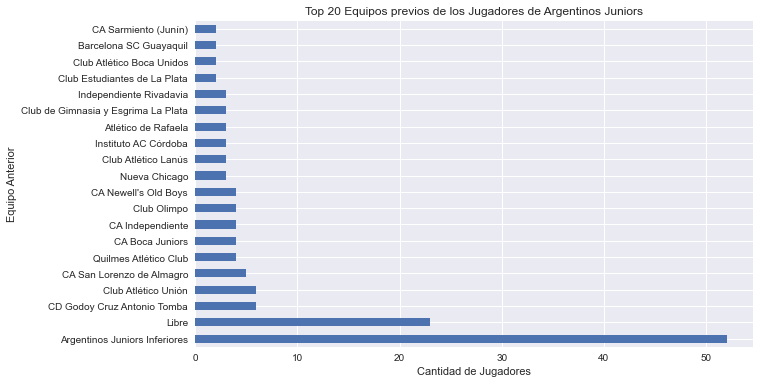

In [28]:
# Se filtran los jugados con un valor de mercado mayor a 100,000 euros
filtered_df = df[df["Valor de mercado"] > 100000]

# Filtro para solo contar una vez a cada jugador
filtered_df = filtered_df.drop_duplicates(subset="Jugadores", keep="first")

# Contar la frecuencia de cada equipo anterior
team_counts = filtered_df["Equipo Anterior"].value_counts().head(20)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
team_counts.plot(kind="barh")
plt.title("Top 20 Equipos previos de los Jugadores de Argentinos Juniors")
plt.xlabel("Cantidad de Jugadores")
plt.ylabel("Equipo Anterior")
plt.show()




In this code, we first filter the players with a market value greater than 100,000 euros. Then, we ensure that each player is counted only once by removing duplicates based on their names. Finally, we count the frequency of each previous team among the filtered players and create a horizontal bar chart to visualize the top 20 previous teams with the most players in Argentinos Juniors.


**Footed Distribution: Proportion of Left and Right-Footed Players**

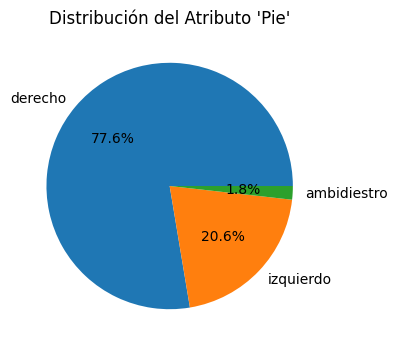

In [9]:

# Contar la frecuencia de cada valor en la columna "Pie"
footed_counts = df["Pie"].value_counts()

# Configurar el estilo del gráfico
plt.style.use("default")

# Crear el gráfico de torta con fondo blanco
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_facecolor("white")
ax.pie(footed_counts, labels=footed_counts.index, autopct='%1.1f%%')
ax.set_title("Distribución del Atributo 'Pie'")

plt.show()


**Age Distribution by Season: Box Plot**

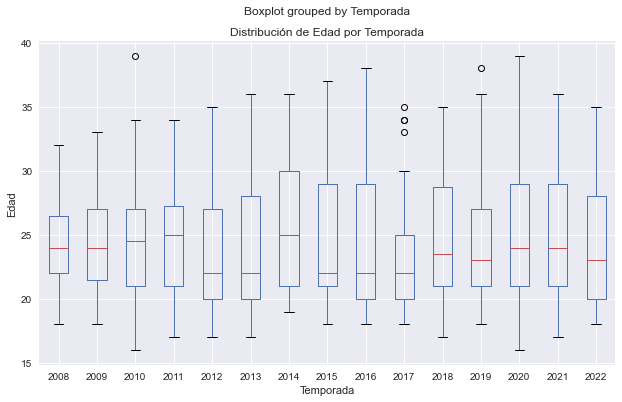

In [14]:
# Se filtran los jugados con un valor de mercado mayor a 100,000 euros
filtered_df = df[df["Valor de mercado"] > 100000]

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de cajas
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column="Edad", by="Temporada", ax=ax)
ax.set_xlabel("Temporada")
ax.set_ylabel("Edad")
ax.set_title("Distribución de Edad por Temporada")

plt.show()


Explanation: This code snippet first cleans the "Fecha de nacimiento" (Date of Birth) column by removing any parentheses. Then, it calculates the age for each player based on the cleaned date of birth. The "Edad" (Age) column is converted to numeric values, and a box plot is created to visualize the distribution of ages for each season. The box plot allows us to observe the spread, median, quartiles, and potential outliers in the age distribution across different seasons for the players of "Argentinos Juniors" football team.






**Top 10 Oldest Players by Age and Season**





In [10]:
# Filtro para solo contar una vez a cada jugador
filtered_df = df.drop_duplicates(subset="Jugadores", keep="first")

# Se filtran los jugadores con un valor de mercado mayor a 100,000 euros
filtered_df = filtered_df[df["Valor de mercado"] > 100000]

# Ordenar el DataFrame por edad en forma descendente
oldest_players = filtered_df.sort_values("Edad", ascending=False).head(10)

# Mostrar la tabla con los 10 jugadores más viejos (solo Jugadores, Edad y Temporada)
oldest_players_table = oldest_players[["Jugadores", "Edad", "Temporada"]]

# Convert the DataFrame to a tabular representation with colors using pandas Styler
styled_oldest_players_table = oldest_players_table.style.background_gradient(cmap='YlGnBu', subset=["Edad"])

# Display the styled table in Jupyter Notebook
display(styled_oldest_players_table)

,Jugadores,Edad,Temporada
138,José Luis Calderón,39,2010
560,Santiago Silva,38,2019
259,Diego Placente,36,2013
432,Carlos Bueno,36,2016
318,Cristian Álvarez,36,2014
332,Juan Román Riquelme,36,2014
196,Aníbal Matellán,35,2012
328,Cristian Ledesma,35,2014
324,Martín Zapata,34,2014
444,Sebastián Martínez,34,2017


The DataFrame is sorted in descending order by age, and the top 10 oldest players are displayed in a table showing their names, ages, and respective seasons.

aAlexis

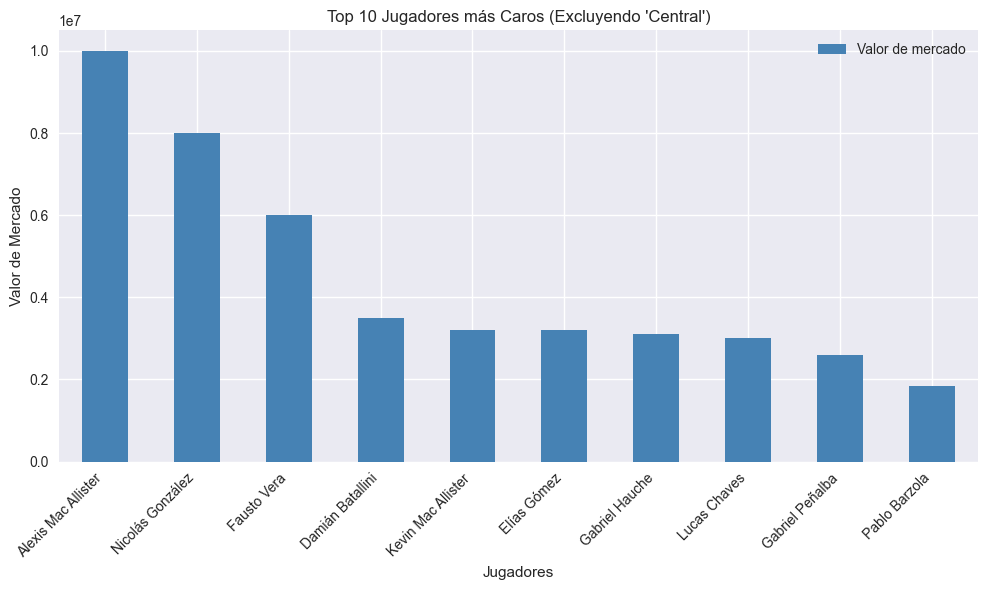

                  Posicion            Jugadores  Valor de mercado
543   Mediocentro ofensivo  Alexis Mac Allister          10000000
498      Extremo izquierdo     Nicolás González           8000000
678  Mediocampista central          Fausto Vera           6000000
604        Extremo derecho     Damián Batallini           3500000
667        Defensa central   Kevin Mac Allister           3200000
631      Lateral izquierdo          Elías Gómez           3200000
38        Delantero centro       Gabriel Hauche           3100000
663                Portero         Lucas Chaves           3000000
23             Mediocentro      Gabriel Peñalba           2600000
18         Lateral derecho        Pablo Barzola           1850000


In [25]:

# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
filtered_df = df.loc[df.groupby("Jugadores")["Valor de mercado"].idxmax()]

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros y que la posición no sea "Central"
filtered_df = filtered_df[(filtered_df["Valor de mercado"] > 100000) 

# Obtener el valor de mercado más caro para cada posición, excluyendo la posición "Central"
highest_value_per_position = filtered_df[filtered_df["Posicion"] != "Central"].groupby("Posicion")["Valor de mercado"].max()

# Obtener el nombre del jugador más caro para cada posición, excluyendo la posición "Central"
highest_value_players = filtered_df[filtered_df["Posicion"] != "Central"].loc[filtered_df.groupby("Posicion")["Valor de mercado"].idxmax()]

# Ordenar los valores de menor a mayor
highest_value_per_position = highest_value_per_position.sort_values()

# Mostrar la tabla con el nombre del jugador más caro por posición, excluyendo la posición "Central"
highest_value_players_table = highest_value_players[highest_value_players["Posicion"] != "Central"][["Posicion", "Jugadores", "Valor de mercado"]]

# Ordenar los jugadores por valor de mercado de manera descendente y seleccionar los 10 más caros
top_10_players = highest_value_players_table.sort_values("Valor de mercado", ascending=False).head(10)

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
top_10_players.plot(kind="bar", x="Jugadores", y="Valor de mercado", ax=ax, color="steelblue")

# Etiquetas del eje X inclinadas a 45 grados
ax.set_xticklabels(top_10_players["Jugadores"], rotation=45, ha='right')

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel("Jugadores")
ax.set_ylabel("Valor de Mercado")
ax.set_title("Top 10 Jugadores más Caros (Excluyendo 'Central')")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar la tabla con los 10 jugadores más caros (excluyendo la posición "Central")
print(top_10_players)

**Top 5 Most Expensive Players by Position**

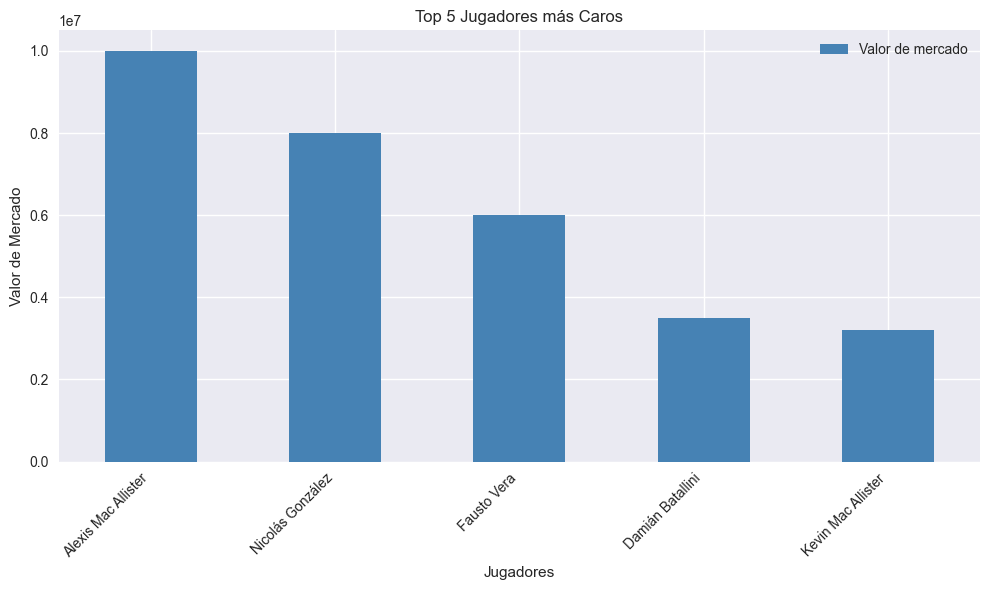

                  Posicion            Jugadores  Valor de mercado
543   Mediocentro ofensivo  Alexis Mac Allister          10000000
498      Extremo izquierdo     Nicolás González           8000000
678  Mediocampista central          Fausto Vera           6000000
604        Extremo derecho     Damián Batallini           3500000
667        Defensa central   Kevin Mac Allister           3200000


In [34]:
# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
filtered_df = df.loc[df.groupby("Jugadores")["Valor de mercado"].idxmax()]

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
filtered_df = filtered_df[filtered_df["Valor de mercado"] > 100000]

# Obtener el valor de mercado más caro para cada posición
highest_value_per_position = filtered_df.groupby("Posicion")["Valor de mercado"].max()

# Obtener el nombre del jugador más caro para cada posición
highest_value_players = filtered_df.loc[filtered_df.groupby("Posicion")["Valor de mercado"].idxmax()]

# Ordenar los valores de menor a mayor
highest_value_per_position = highest_value_per_position.sort_values()

# Mostrar la tabla con el nombre del jugador más caro por posición
highest_value_players_table = highest_value_players[["Posicion", "Jugadores", "Valor de mercado"]]

# Ordenar los jugadores por valor de mercado de manera descendente y seleccionar los 5 más caros
top_5_players = highest_value_players_table.sort_values("Valor de mercado", ascending=False).head(5)

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
top_5_players.plot(kind="bar", x="Jugadores", y="Valor de mercado", ax=ax, color="steelblue")

# Etiquetas del eje X inclinadas a 45 grados
ax.set_xticklabels(top_5_players["Jugadores"], rotation=45, ha='right')

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel("Jugadores")
ax.set_ylabel("Valor de Mercado")
ax.set_title("Top 5 Jugadores más Caros")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar la tabla con los 5 jugadores más caros
print(top_5_players)


 This code performs a series of data filtering and aggregation operations to identify the top 5 most expensive football players for each position. It starts by selecting the last appearance of each player with their maximum market value. Then, it filters out players with a market value greater than 100,000 euros. 

**Market Value Distribution by Position**

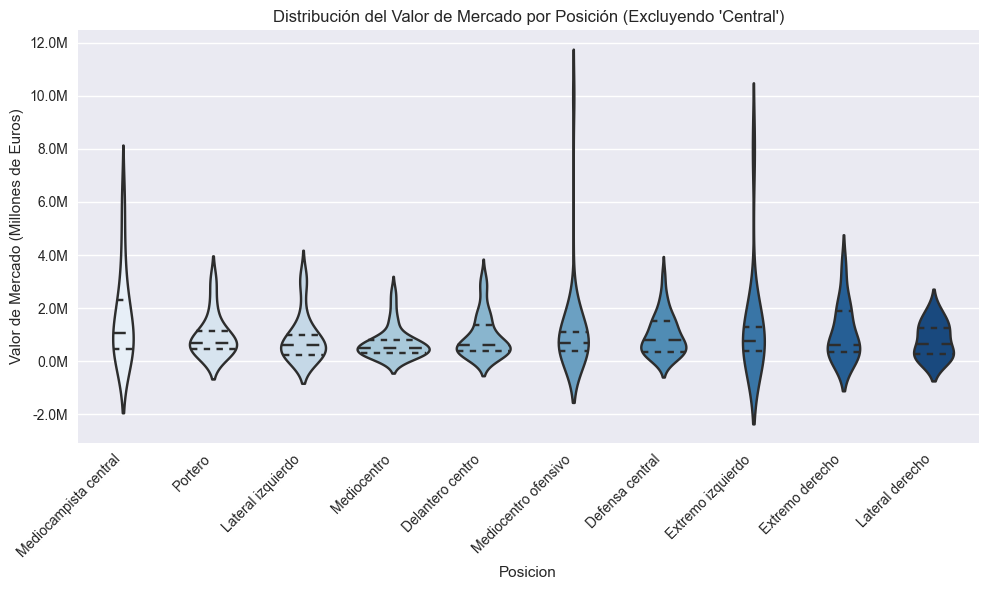

In [38]:

# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
filtered_df = df.loc[df.groupby("Jugadores")["Valor de mercado"].idxmax()]

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
filtered_df = filtered_df[filtered_df["Valor de mercado"] > 100000]

# Filtrar la posición "Central"
filtered_df = filtered_df[filtered_df["Posicion"] != "Central"]

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x="Posicion", y="Valor de mercado", palette="Blues", inner="quartile")

# Formatear el eje Y para mostrar los valores en millones y sin notación exponencial
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Etiquetas del eje X inclinadas a 45 grados
plt.xticks(rotation=45, ha='right')

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Posicion")
plt.ylabel("Valor de Mercado (Millones de Euros)")
plt.title("Distribución del Valor de Mercado por Posición (Excluyendo 'Central')")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

 This violin plot illustrates the distribution of market values for football players, categorized by their respective positions.

**Average Height of Players by Position**

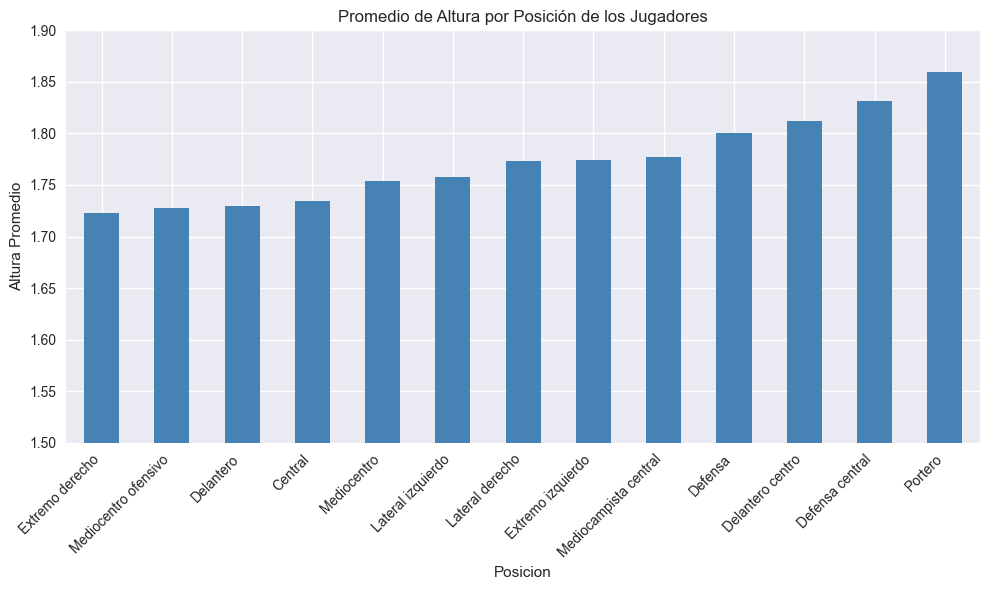

In [46]:
plt.style.use("seaborn")

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
filtered_df = filtered_df[filtered_df["Valor de mercado"] > 100000]

#Calcular el promedio de altura para cada posición
average_height_per_position = df.groupby("Posicion")["Altura"].mean().sort_values()

#Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
average_height_per_position.plot(kind="bar", ax=ax, color="steelblue")

#Etiquetas del eje X inclinadas a 45 grados
ax.set_xticklabels(average_height_per_position.index, rotation=45, ha='right')

#Etiquetas de los ejes y título del gráfico
ax.set_xlabel("Posicion")
ax.set_ylabel("Altura Promedio")
ax.set_title("Promedio de Altura por Posición de los Jugadores")

# Establecer límites en el eje Y
ax.set_ylim(1.5, 1.9)

#Mostrar el gráfico
plt.tight_layout()
plt.show()

his bar chart illustrates the average height of soccer players categorized by their respective positions. The Y-axis is limited to display heights within the range of 1.5 to 1.8 meters, providing a focused view of the average height distribution across different playing positions.

**Top 5 Shortest and Tallest Players**

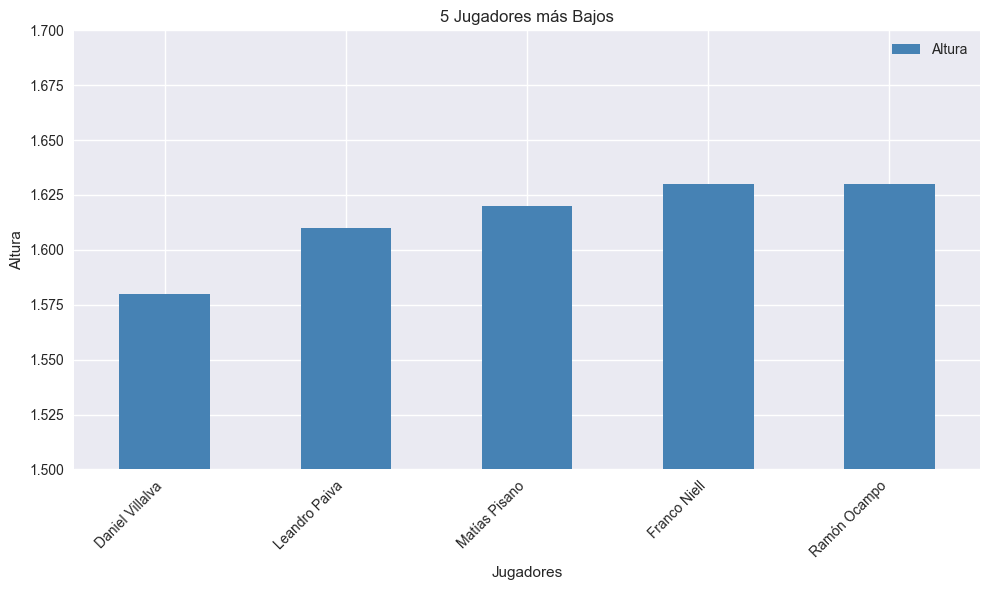

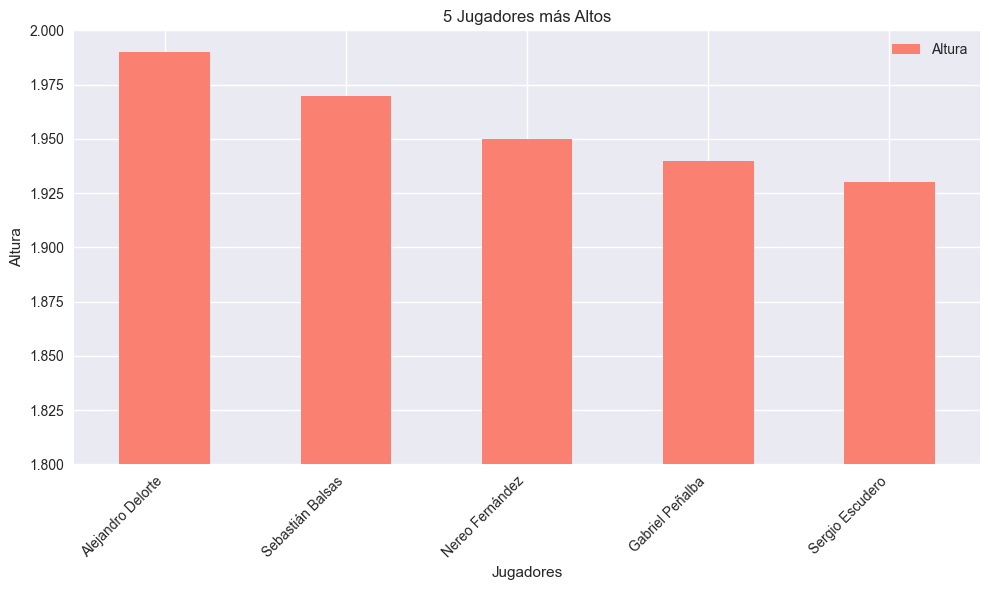

             Jugadores  Altura  Temporada
285    Daniel Villalva    1.58       2013
546      Leandro Paiva    1.61       2019
605      Matías Pisano    1.62       2020
41        Franco Niell    1.63       2008
119       Ramón Ocampo    1.63       2010
39   Alejandro Delorte    1.99       2008
236   Sebastián Balsas    1.97       2012
145    Nereo Fernández    1.95       2011
23     Gabriel Peñalba    1.94       2008
14     Sergio Escudero    1.93       2008


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los 5 jugadores más bajos sin duplicados
jugadores_mas_bajos = df.drop_duplicates(subset="Jugadores").nsmallest(5, "Altura")[["Jugadores", "Altura", "Temporada"]]

# Obtener los 5 jugadores más altos sin duplicados
jugadores_mas_altos = df.drop_duplicates(subset="Jugadores").nlargest(5, "Altura")[["Jugadores", "Altura", "Temporada"]]

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras para los 5 jugadores más bajos
fig, ax1 = plt.subplots(figsize=(10, 6))
jugadores_mas_bajos.plot(kind="bar", x="Jugadores", y="Altura", ax=ax1, color="steelblue")

# Etiquetas del eje X inclinadas a 45 grados
ax1.set_xticklabels(jugadores_mas_bajos["Jugadores"], rotation=45, ha='right')

# Etiquetas de los ejes y título del gráfico
ax1.set_xlabel("Jugadores")
ax1.set_ylabel("Altura")
ax1.set_title("5 Jugadores más Bajos")

# Establecer límites del eje Y para el rango de alturas de 1.5 a 1.7
ax1.set_ylim(1.5, 1.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Crear el gráfico de barras para los 5 jugadores más altos
fig, ax2 = plt.subplots(figsize=(10, 6))
jugadores_mas_altos.plot(kind="bar", x="Jugadores", y="Altura", ax=ax2, color="salmon")

# Etiquetas del eje X inclinadas a 45 grados
ax2.set_xticklabels(jugadores_mas_altos["Jugadores"], rotation=45, ha='right')

# Etiquetas de los ejes y título del gráfico
ax2.set_xlabel("Jugadores")
ax2.set_ylabel("Altura")
ax2.set_title("5 Jugadores más Altos")

# Establecer límites del eje Y para el rango de alturas de 1.8 a 2.0
ax2.set_ylim(1.8, 2.0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Obtener los 5 jugadores más bajos sin duplicados
jugadores_mas_bajos = df.drop_duplicates(subset="Jugadores").nsmallest(5, "Altura")[["Jugadores", "Altura", "Temporada"]]

# Obtener los 5 jugadores más altos sin duplicados
jugadores_mas_altos = df.drop_duplicates(subset="Jugadores").nlargest(5, "Altura")[["Jugadores", "Altura", "Temporada"]]

# Combinar los DataFrames y mostrar la tabla
tabla = pd.concat([jugadores_mas_bajos, jugadores_mas_altos])
print(tabla)


This code retrieves the data of the 5 shortest and 5 tallest players (without duplicates) from a DataFrame containing player information. It then creates two separate bar charts, one displaying the 5 shortest players with their respective heights and seasons, and the other displaying the 5 tallest players with their respective heights and seasons. 